The dataset used for this project can be found in this link below:
https://www.kaggle.com/datasets/patrickzel/flight-delay-and-cancellation-dataset-2019-2023/data

After the data set is loaded press Ctrl + F9 to run all cells

This file contains Data Preprocessing and Implementation of Decision Tree : Baseline Model and XGBoost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('flights_sample_3m.csv')

In [3]:
df1.shape

(3000000, 32)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

Dropping Unwanted Columns

In [5]:
df1 = df1.drop(['CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'FL_NUMBER', 'DEP_TIME', 'ARR_TIME', ], axis = 1)

In [6]:
df1.shape

(3000000, 26)

Dropping Duplicates

In [7]:
df1 = df1.drop_duplicates()

In [8]:
df1.shape

(3000000, 26)

Dropping the year 2018 & 2019

In [9]:
df1['FL_DATE'] = pd.to_datetime(df1['FL_DATE'])

df1 = df1[~df1['FL_DATE'].dt.year.isin([2018, 2019])]

df1.reset_index(drop=True, inplace=True)

In [10]:
df1.shape

(2242327, 26)

Dropping Airline

In [11]:
specified_airlines = ['United Air Lines Inc.', 'Delta Air Lines Inc.', 'Spirit Air Lines',
                      'Southwest Airlines Co.', 'American Airlines Inc.', 'Republic Airline',
                      'Alaska Airlines Inc.', 'JetBlue Airways', 'SkyWest Airlines Inc.',
                      'Frontier Airlines Inc.']

In [12]:
df1 = df1[df1['AIRLINE'].isin(specified_airlines)]

In [13]:
df1.reset_index(drop=True, inplace=True)

In [14]:
df1.shape

(1857356, 26)

Delay

In [15]:
print(df1.DELAY_DUE_CARRIER.isna().sum())
print(df1.DELAY_DUE_WEATHER.isna().sum())
print(df1.DELAY_DUE_NAS.isna().sum())
print(df1.DELAY_DUE_SECURITY.isna().sum())
print(df1.DELAY_DUE_LATE_AIRCRAFT.isna().sum())

1526158
1526158
1526158
1526158
1526158


In [16]:
print("Percentage of valid data:", 100 - (df1.DELAY_DUE_CARRIER.isna().sum()*100/len(df1)))
print("Percentage of missing values:", (df1.DELAY_DUE_CARRIER.isna().sum()*100/len(df1)))

Percentage of valid data: 17.831691931972117
Percentage of missing values: 82.16830806802788


In [17]:
df1 = df1.drop(['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT'], axis=1)
print('The current shape of df1 is:', df1.shape)

The current shape of df1 is: (1857356, 21)


Saving DataFrame

In [18]:
df1.to_csv('df1.csv')

Dealing with NaN

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857356 entries, 0 to 1857355
Data columns (total 21 columns):
 #   Column            Dtype         
---  ------            -----         
 0   FL_DATE           datetime64[ns]
 1   AIRLINE           object        
 2   AIRLINE_DOT       object        
 3   AIRLINE_CODE      object        
 4   DOT_CODE          int64         
 5   ORIGIN            object        
 6   ORIGIN_CITY       object        
 7   DEST              object        
 8   DEST_CITY         object        
 9   CRS_DEP_TIME      int64         
 10  DEP_DELAY         float64       
 11  TAXI_OUT          float64       
 12  WHEELS_OFF        float64       
 13  WHEELS_ON         float64       
 14  TAXI_IN           float64       
 15  CRS_ARR_TIME      int64         
 16  ARR_DELAY         float64       
 17  CRS_ELAPSED_TIME  float64       
 18  ELAPSED_TIME      float64       
 19  AIR_TIME          float64       
 20  DISTANCE          float64       
dtypes: datet

In [20]:
df1.isna().sum()

FL_DATE                 0
AIRLINE                 0
AIRLINE_DOT             0
AIRLINE_CODE            0
DOT_CODE                0
ORIGIN                  0
ORIGIN_CITY             0
DEST                    0
DEST_CITY               0
CRS_DEP_TIME            0
DEP_DELAY           52504
TAXI_OUT            53123
WHEELS_OFF          53123
WHEELS_ON           53742
TAXI_IN             53742
CRS_ARR_TIME            0
ARR_DELAY           57551
CRS_ELAPSED_TIME        1
ELAPSED_TIME        57551
AIR_TIME            57551
DISTANCE                0
dtype: int64

In [21]:
print('Number of total missing values:', df1.isna().sum().sum())
print('df1 shape:', df1.shape)

Number of total missing values: 438888
df1 shape: (1857356, 21)


In [22]:
df_NaN = df1.loc[df1.isnull().any(axis=1)]

In [23]:
df_NaN.shape

(57551, 21)

In [24]:
percentage_NaN = (len(df_NaN)*100)/len(df1)
print('Percentage of rows with at least 1 NaN value:', percentage_NaN)

Percentage of rows with at least 1 NaN value: 3.0985443824447225


Depature Delay

In [25]:
df1["DEP_DELAY"] = df1["DEP_DELAY"].fillna(0)
df1.isna().sum()

FL_DATE                 0
AIRLINE                 0
AIRLINE_DOT             0
AIRLINE_CODE            0
DOT_CODE                0
ORIGIN                  0
ORIGIN_CITY             0
DEST                    0
DEST_CITY               0
CRS_DEP_TIME            0
DEP_DELAY               0
TAXI_OUT            53123
WHEELS_OFF          53123
WHEELS_ON           53742
TAXI_IN             53742
CRS_ARR_TIME            0
ARR_DELAY           57551
CRS_ELAPSED_TIME        1
ELAPSED_TIME        57551
AIR_TIME            57551
DISTANCE                0
dtype: int64

Taxi In

In [26]:
df1['TAXI_IN'].fillna((df1['TAXI_IN'].mean()), inplace=True)
df_NaN['TAXI_IN'].fillna((df_NaN['TAXI_IN'].mean()), inplace=True)

In [27]:
df_NaN.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE
10,2020-04-07,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,SJC,"San Jose, CA",LAX,"Los Angeles, CA",2155,NaN,NaN,NaN,NaN,10.573641,2315,NaN,80.0,NaN,NaN,308.0
26,2022-01-02,Republic Airline,Republic Airline: YX,YX,20452,ORD,"Chicago, IL",DCA,"Washington, DC",1935,NaN,NaN,NaN,NaN,10.573641,2241,NaN,126.0,NaN,NaN,612.0
47,2020-04-20,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,BNA,"Nashville, TN",ATL,"Atlanta, GA",1055,NaN,NaN,NaN,NaN,10.573641,1300,NaN,65.0,NaN,NaN,214.0
112,2021-12-31,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,IAD,"Washington, DC",LAX,"Los Angeles, CA",1720,NaN,NaN,NaN,NaN,10.573641,2024,NaN,364.0,NaN,NaN,2288.0
140,2020-04-14,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,LAS,"Las Vegas, NV",HOU,"Houston, TX",500,NaN,NaN,NaN,NaN,10.573641,955,NaN,175.0,NaN,NaN,1235.0


In [28]:
df1.TAXI_IN.isna().sum()

0

Dropping NaN

In [29]:
df1 = df1.dropna()

In [30]:
df1.shape

(1799805, 21)

In [31]:
df1.isna().sum()

FL_DATE             0
AIRLINE             0
AIRLINE_DOT         0
AIRLINE_CODE        0
DOT_CODE            0
ORIGIN              0
ORIGIN_CITY         0
DEST                0
DEST_CITY           0
CRS_DEP_TIME        0
DEP_DELAY           0
TAXI_OUT            0
WHEELS_OFF          0
WHEELS_ON           0
TAXI_IN             0
CRS_ARR_TIME        0
ARR_DELAY           0
CRS_ELAPSED_TIME    0
ELAPSED_TIME        0
AIR_TIME            0
DISTANCE            0
dtype: int64

Time Related Columns

In [32]:
df1['CRS_DEP_TIME'] = np.ceil(df1['CRS_DEP_TIME']/600).apply(int)
df1['WHEELS_OFF'] = np.ceil(df1['WHEELS_OFF']/600).apply(int)
df1['WHEELS_ON'] = np.ceil(df1['WHEELS_ON']/600).apply(int)
df1['CRS_ARR_TIME'] = np.ceil(df1['CRS_ARR_TIME']/600).apply(int)

Data Engineering
Date Format

In [33]:
df1['DAY'] = pd.DatetimeIndex(df1['FL_DATE']).day
df1['MONTH'] = pd.DatetimeIndex(df1['FL_DATE']).month
df1['YEAR'] = pd.DatetimeIndex(df1['FL_DATE']).year

In [34]:
print('Days present in dataframe:', df1.DAY.unique())
print('Months present in dataframe:', df1.MONTH.unique())
print('Years present in dataframe:', df1.YEAR.unique())

Days present in dataframe: [19 22  6 23 11 12 31  5  1 25 15  8 28 17  4 20  3 26 16  7 14  2 30 29
 27 10  9 13 24 18 21]
Months present in dataframe: [11  7  3  2  6  8  5 12  9  4 10  1]
Years present in dataframe: [2022 2023 2020 2021]


Binary Classification

In [35]:
status = []

for value in df1['ARR_DELAY']:
    if value < 0:
        status.append(0)
    else:
        status.append(1)
df1['FLIGHT_STATUS'] = status

In [36]:
df1.FLIGHT_STATUS.value_counts(normalize=True)

FLIGHT_STATUS
0    0.6457
1    0.3543
Name: proportion, dtype: float64

Saving DataFrame

In [37]:
df1.to_csv('df1.csv')

In [38]:
df1.isna().sum()

FL_DATE             0
AIRLINE             0
AIRLINE_DOT         0
AIRLINE_CODE        0
DOT_CODE            0
ORIGIN              0
ORIGIN_CITY         0
DEST                0
DEST_CITY           0
CRS_DEP_TIME        0
DEP_DELAY           0
TAXI_OUT            0
WHEELS_OFF          0
WHEELS_ON           0
TAXI_IN             0
CRS_ARR_TIME        0
ARR_DELAY           0
CRS_ELAPSED_TIME    0
ELAPSED_TIME        0
AIR_TIME            0
DISTANCE            0
DAY                 0
MONTH               0
YEAR                0
FLIGHT_STATUS       0
dtype: int64

Data Loading

In [39]:
sns.set_style('darkgrid')

pd.set_option('display.max_columns', None)
import datetime, warnings
warnings.filterwarnings("ignore")

In [40]:
df = pd.read_csv('df1.csv', index_col=0)

In [41]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['WEEKDAY'] = df['FL_DATE'].dt.dayofweek

In [42]:
df.WEEKDAY.value_counts()

WEEKDAY
3    266688
0    266493
4    265677
6    261381
2    253507
1    251374
5    234685
Name: count, dtype: int64

In [43]:
df.YEAR.value_counts()

YEAR
2022    559928
2021    480294
2023    399884
2020    359699
Name: count, dtype: int64

Destination City

In [44]:
df.DEST_CITY.value_counts().iloc[:25]

DEST_CITY
Chicago, IL              95579
Atlanta, GA              95546
Denver, CO               90635
Dallas/Fort Worth, TX    66916
New York, NY             64824
Los Angeles, CA          60090
Phoenix, AZ              52036
Las Vegas, NV            51218
Houston, TX              49763
Seattle, WA              48682
Orlando, FL              47496
Charlotte, NC            43076
Washington, DC           41695
San Francisco, CA        39773
Salt Lake City, UT       39344
Boston, MA               38047
Minneapolis, MN          36294
Newark, NJ               36046
Detroit, MI              35184
Baltimore, MD            28411
Fort Lauderdale, FL      28014
Miami, FL                27802
San Diego, CA            25506
Nashville, TN            25308
Philadelphia, PA         24289
Name: count, dtype: int64

In [45]:
top_cities = df.DEST_CITY.value_counts().iloc[0:25].rename_axis('DEST_CITY').reset_index(name='TOTAL_FLIGHTS')
top_cities.head()

,DEST_CITY,TOTAL_FLIGHTS
0,"Chicago, IL",95579
1,"Atlanta, GA",95546
2,"Denver, CO",90635
3,"Dallas/Fort Worth, TX",66916
4,"New York, NY",64824


In [46]:
# Checking the cities within the numpy array just to verify that it worked
top_cities.DEST_CITY.unique()

array(['Chicago, IL', 'Atlanta, GA', 'Denver, CO',
       'Dallas/Fort Worth, TX', 'New York, NY', 'Los Angeles, CA',
       'Phoenix, AZ', 'Las Vegas, NV', 'Houston, TX', 'Seattle, WA',
       'Orlando, FL', 'Charlotte, NC', 'Washington, DC',
       'San Francisco, CA', 'Salt Lake City, UT', 'Boston, MA',
       'Minneapolis, MN', 'Newark, NJ', 'Detroit, MI', 'Baltimore, MD',
       'Fort Lauderdale, FL', 'Miami, FL', 'San Diego, CA',
       'Nashville, TN', 'Philadelphia, PA'], dtype=object)

In [47]:
# Creating a list with top 25 cities only:
city_list = top_cities['DEST_CITY'].tolist()

In [48]:
# Checking the list's content
city_list

['Chicago, IL',
 'Atlanta, GA',
 'Denver, CO',
 'Dallas/Fort Worth, TX',
 'New York, NY',
 'Los Angeles, CA',
 'Phoenix, AZ',
 'Las Vegas, NV',
 'Houston, TX',
 'Seattle, WA',
 'Orlando, FL',
 'Charlotte, NC',
 'Washington, DC',
 'San Francisco, CA',
 'Salt Lake City, UT',
 'Boston, MA',
 'Minneapolis, MN',
 'Newark, NJ',
 'Detroit, MI',
 'Baltimore, MD',
 'Fort Lauderdale, FL',
 'Miami, FL',
 'San Diego, CA',
 'Nashville, TN',
 'Philadelphia, PA']

In [49]:
boolean_series = df.DEST_CITY.isin(city_list)
dfm = df[boolean_series]
dfm.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,YEAR,FLIGHT_STATUS,WEEKDAY
0,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,MSP,"Minneapolis, MN",SEA,"Seattle, WA",4,-6.0,9.0,4,4,38.0,4,-5.0,235.0,236.0,189.0,1399.0,19,11,2022,0,5
1,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,DEN,"Denver, CO",MSP,"Minneapolis, MN",2,6.0,20.0,2,3,5.0,3,0.0,118.0,112.0,87.0,680.0,22,7,2022,1,4
2,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",3,-1.0,27.0,3,4,9.0,4,24.0,260.0,285.0,249.0,1589.0,6,3,2023,1,0
3,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",4,-2.0,15.0,4,4,14.0,4,-1.0,181.0,182.0,153.0,985.0,23,2,2020,0,6
4,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,DCA,"Washington, DC",BOS,"Boston, MA",2,-9.0,23.0,2,2,8.0,2,-29.0,109.0,89.0,58.0,399.0,11,6,2023,0,6


In [50]:
dfm.DEST_CITY.unique()

array(['Seattle, WA', 'Minneapolis, MN', 'San Francisco, CA',
       'Dallas/Fort Worth, TX', 'Boston, MA', 'Los Angeles, CA',
       'Nashville, TN', 'Atlanta, GA', 'Newark, NJ', 'Houston, TX',
       'Denver, CO', 'New York, NY', 'Salt Lake City, UT', 'Orlando, FL',
       'Chicago, IL', 'San Diego, CA', 'Las Vegas, NV', 'Detroit, MI',
       'Charlotte, NC', 'Miami, FL', 'Philadelphia, PA', 'Washington, DC',
       'Phoenix, AZ', 'Fort Lauderdale, FL', 'Baltimore, MD'],
      dtype=object)

In [51]:
dfm.DEST_CITY.value_counts()

DEST_CITY
Chicago, IL              95579
Atlanta, GA              95546
Denver, CO               90635
Dallas/Fort Worth, TX    66916
New York, NY             64824
Los Angeles, CA          60090
Phoenix, AZ              52036
Las Vegas, NV            51218
Houston, TX              49763
Seattle, WA              48682
Orlando, FL              47496
Charlotte, NC            43076
Washington, DC           41695
San Francisco, CA        39773
Salt Lake City, UT       39344
Boston, MA               38047
Minneapolis, MN          36294
Newark, NJ               36046
Detroit, MI              35184
Baltimore, MD            28411
Fort Lauderdale, FL      28014
Miami, FL                27802
San Diego, CA            25506
Nashville, TN            25308
Philadelphia, PA         24289
Name: count, dtype: int64

In [52]:
dfm.shape

(1191574, 26)

In [53]:
df.shape

(1799805, 26)

In [54]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1191574 entries, 0 to 1857355
Data columns (total 26 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   FL_DATE           1191574 non-null  datetime64[ns]
 1   AIRLINE           1191574 non-null  object        
 2   AIRLINE_DOT       1191574 non-null  object        
 3   AIRLINE_CODE      1191574 non-null  object        
 4   DOT_CODE          1191574 non-null  int64         
 5   ORIGIN            1191574 non-null  object        
 6   ORIGIN_CITY       1191574 non-null  object        
 7   DEST              1191574 non-null  object        
 8   DEST_CITY         1191574 non-null  object        
 9   CRS_DEP_TIME      1191574 non-null  int64         
 10  DEP_DELAY         1191574 non-null  float64       
 11  TAXI_OUT          1191574 non-null  float64       
 12  WHEELS_OFF        1191574 non-null  int64         
 13  WHEELS_ON         1191574 non-null  int64      

In [55]:
dfm = dfm.drop(columns=['FL_DATE'])

In [56]:
dfm.head()

,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,YEAR,FLIGHT_STATUS,WEEKDAY
0,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,MSP,"Minneapolis, MN",SEA,"Seattle, WA",4,-6.0,9.0,4,4,38.0,4,-5.0,235.0,236.0,189.0,1399.0,19,11,2022,0,5
1,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,DEN,"Denver, CO",MSP,"Minneapolis, MN",2,6.0,20.0,2,3,5.0,3,0.0,118.0,112.0,87.0,680.0,22,7,2022,1,4
2,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",3,-1.0,27.0,3,4,9.0,4,24.0,260.0,285.0,249.0,1589.0,6,3,2023,1,0
3,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",4,-2.0,15.0,4,4,14.0,4,-1.0,181.0,182.0,153.0,985.0,23,2,2020,0,6
4,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,DCA,"Washington, DC",BOS,"Boston, MA",2,-9.0,23.0,2,2,8.0,2,-29.0,109.0,89.0,58.0,399.0,11,6,2023,0,6


In [57]:
dfm.shape

(1191574, 25)

Saving DataFrame

In [58]:
dfm.to_csv('dfm.csv')

Collinearity

In [59]:
# Select only the numeric columns
numeric_columns = dfm.select_dtypes(include=['float64', 'int32', 'int64']).columns
dfm_numeric = dfm[numeric_columns]

# Calculate the correlation matrix for numeric columns
dfm_numeric.corr()

,DOT_CODE,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,YEAR,FLIGHT_STATUS,WEEKDAY
DOT_CODE,1.000000,-0.005938,0.006085,0.161756,-0.006640,-2.018824e-02,0.174005,-0.016092,0.022047,0.003443,0.015511,-0.019980,-0.034176,0.000439,-0.002200,-0.002661,-0.006849,6.423976e-03
CRS_DEP_TIME,-0.005938,1.000000,0.084944,-0.002226,0.887876,5.665248e-01,0.015228,0.604134,0.081486,0.062216,0.062070,0.062540,0.065028,-0.000498,-0.001806,0.016370,0.127362,3.942532e-03
DEP_DELAY,0.006085,0.084944,1.000000,0.057516,0.110059,3.548183e-02,0.019843,0.064827,0.966794,0.018871,0.022903,0.014652,0.016357,0.004578,0.004429,0.086727,0.362436,1.672602e-02
TAXI_OUT,0.161756,-0.002226,0.057516,1.000000,0.028169,1.364284e-02,0.046917,0.009116,0.188698,0.103294,0.202596,0.081750,0.068346,0.003491,-0.034385,0.105064,0.289845,-4.641587e-04
WHEELS_OFF,-0.006640,0.887876,0.110059,0.028169,1.000000,6.339383e-01,0.020779,0.647291,0.111315,0.030576,0.034666,0.030205,0.026462,-0.001031,-0.004573,0.020671,0.158656,3.590629e-03
WHEELS_ON,-0.020188,0.566525,0.035482,0.013643,0.633938,1.000000e+00,0.034479,0.883543,0.042569,0.026809,0.033097,0.029089,0.020270,-0.002486,-0.001975,-0.014083,0.103034,3.137998e-07
TAXI_IN,0.174005,0.015228,0.019843,0.046917,0.020779,3.447935e-02,1.000000,0.031875,0.121930,0.063301,0.139844,0.044692,0.038284,0.000791,0.010062,0.082515,0.193907,9.691259e-03
CRS_ARR_TIME,-0.016092,0.604134,0.064827,0.009116,0.647291,8.835430e-01,0.031875,1.000000,0.065792,0.037021,0.039590,0.036544,0.029382,-0.001514,-0.001337,-0.008939,0.106837,2.404310e-04
ARR_DELAY,0.022047,0.081486,0.966794,0.188698,0.111315,4.256902e-02,0.121930,0.065792,1.000000,-0.006172,0.046322,0.013207,-0.001892,0.005441,0.008212,0.099090,0.468488,1.627704e-02
CRS_ELAPSED_TIME,0.003443,0.062216,0.018871,0.103294,0.030576,2.680889e-02,0.063301,0.037021,-0.006172,1.000000,0.981903,0.989013,0.981256,0.001452,-0.010803,0.014053,0.026747,1.035573e-02


In [60]:
dfm = dfm.drop(columns=['AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'ORIGIN', 'DEST'])

In [61]:
numeric_columns = dfm.select_dtypes(include=['float64', 'int32', 'int64']).columns
dfm_numeric = dfm[numeric_columns]

dfm_numeric.corr()

,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,YEAR,FLIGHT_STATUS,WEEKDAY
CRS_DEP_TIME,1.000000,0.084944,-0.002226,0.887876,5.665248e-01,0.015228,0.604134,0.081486,0.062216,0.062070,0.062540,0.065028,-0.000498,-0.001806,0.016370,0.127362,3.942532e-03
DEP_DELAY,0.084944,1.000000,0.057516,0.110059,3.548183e-02,0.019843,0.064827,0.966794,0.018871,0.022903,0.014652,0.016357,0.004578,0.004429,0.086727,0.362436,1.672602e-02
TAXI_OUT,-0.002226,0.057516,1.000000,0.028169,1.364284e-02,0.046917,0.009116,0.188698,0.103294,0.202596,0.081750,0.068346,0.003491,-0.034385,0.105064,0.289845,-4.641587e-04
WHEELS_OFF,0.887876,0.110059,0.028169,1.000000,6.339383e-01,0.020779,0.647291,0.111315,0.030576,0.034666,0.030205,0.026462,-0.001031,-0.004573,0.020671,0.158656,3.590629e-03
WHEELS_ON,0.566525,0.035482,0.013643,0.633938,1.000000e+00,0.034479,0.883543,0.042569,0.026809,0.033097,0.029089,0.020270,-0.002486,-0.001975,-0.014083,0.103034,3.137998e-07
TAXI_IN,0.015228,0.019843,0.046917,0.020779,3.447935e-02,1.000000,0.031875,0.121930,0.063301,0.139844,0.044692,0.038284,0.000791,0.010062,0.082515,0.193907,9.691259e-03
CRS_ARR_TIME,0.604134,0.064827,0.009116,0.647291,8.835430e-01,0.031875,1.000000,0.065792,0.037021,0.039590,0.036544,0.029382,-0.001514,-0.001337,-0.008939,0.106837,2.404310e-04
ARR_DELAY,0.081486,0.966794,0.188698,0.111315,4.256902e-02,0.121930,0.065792,1.000000,-0.006172,0.046322,0.013207,-0.001892,0.005441,0.008212,0.099090,0.468488,1.627704e-02
CRS_ELAPSED_TIME,0.062216,0.018871,0.103294,0.030576,2.680889e-02,0.063301,0.037021,-0.006172,1.000000,0.981903,0.989013,0.981256,0.001452,-0.010803,0.014053,0.026747,1.035573e-02
ELAPSED_TIME,0.062070,0.022903,0.202596,0.034666,3.309679e-02,0.139844,0.039590,0.046322,0.981903,1.000000,0.988366,0.968151,0.002227,-0.007855,0.025734,0.116106,1.049390e-02


In [62]:
abs(dfm_numeric.corr())>.75

,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,YEAR,FLIGHT_STATUS,WEEKDAY
CRS_DEP_TIME,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
DEP_DELAY,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
TAXI_OUT,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
WHEELS_OFF,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
WHEELS_ON,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
TAXI_IN,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
CRS_ARR_TIME,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
ARR_DELAY,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
CRS_ELAPSED_TIME,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False
ELAPSED_TIME,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False


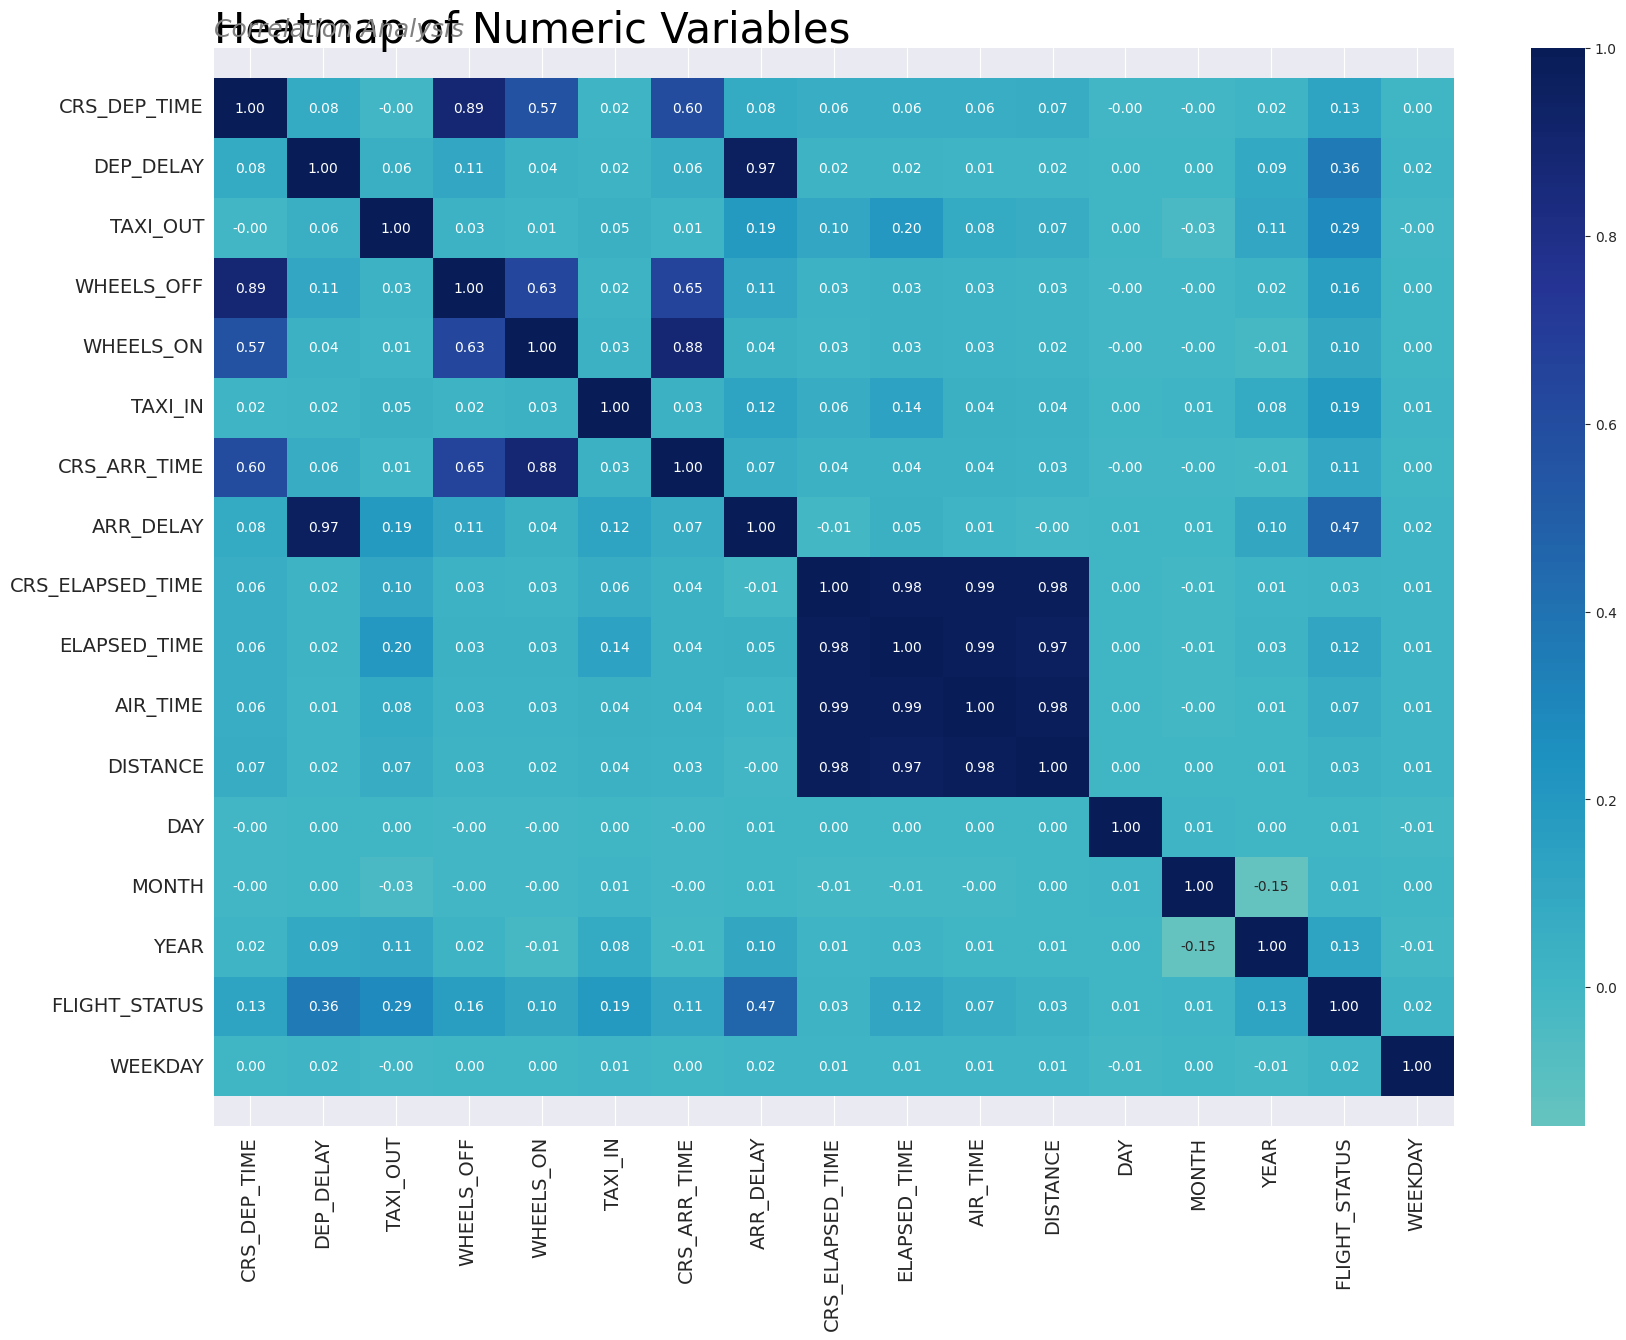

In [63]:
plt.figure(figsize=(20, 14))
ax = sns.heatmap(dfm_numeric.corr(), cmap='YlGnBu', center=0, annot=True, fmt=".2f")
bottom, top = ax.get_ylim()
plt.text(0, -0.6, "Heatmap of Numeric Variables", fontsize=30, color='Black', fontstyle='normal')
plt.text(0, -0.7, "Correlation Analysis", fontsize=18, color='Gray', fontstyle='italic')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

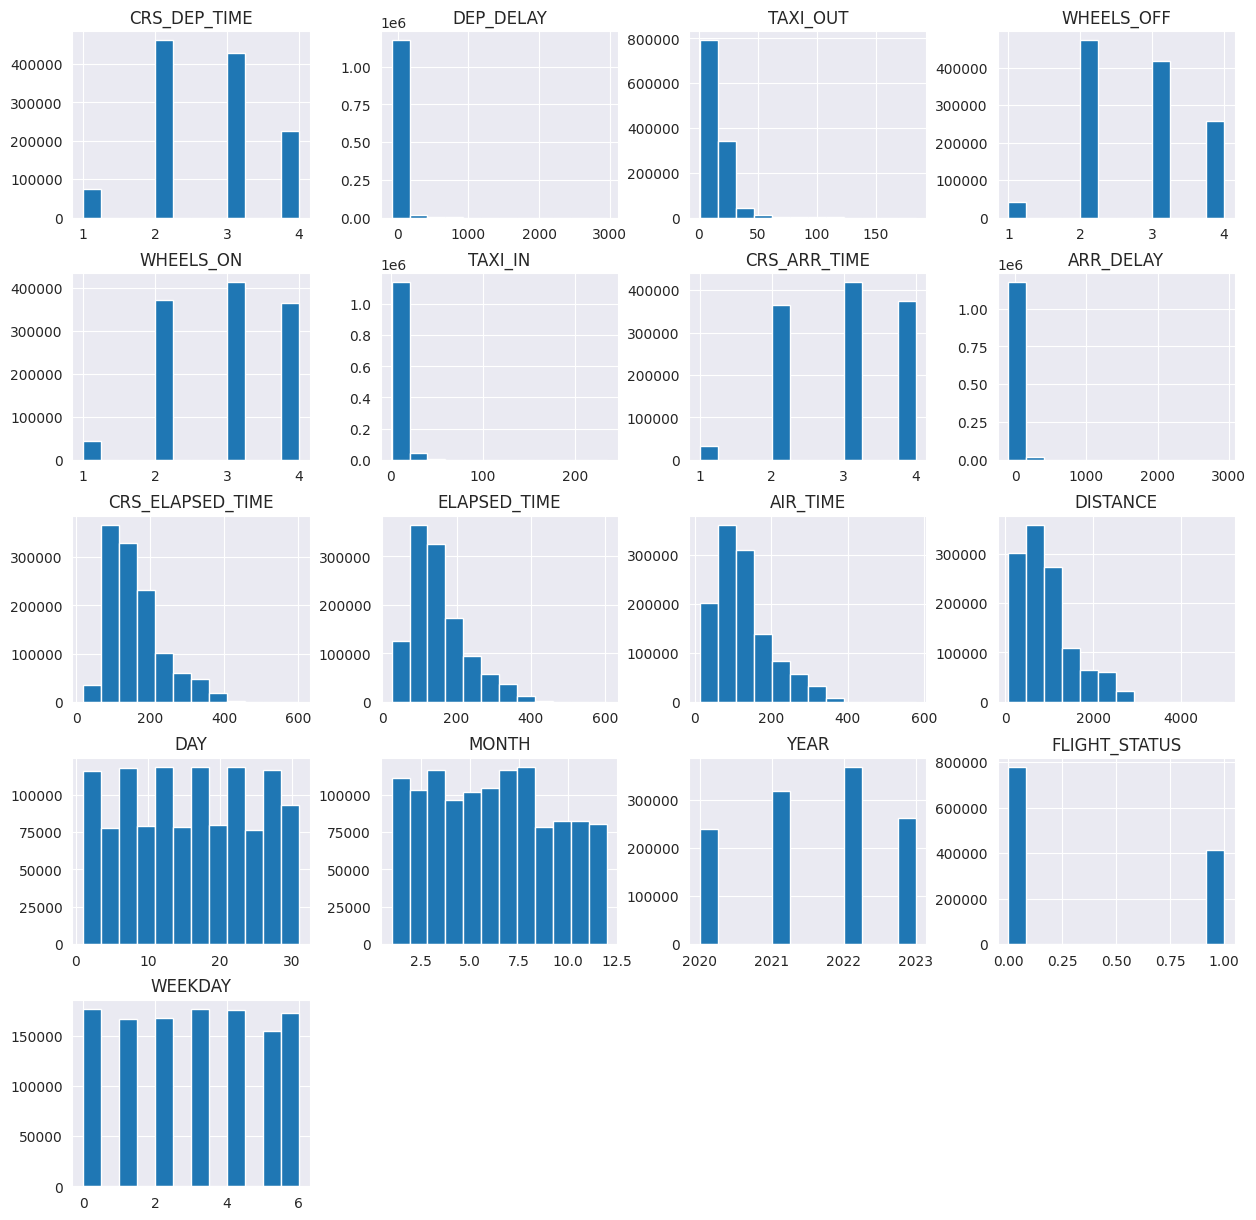

In [64]:
dfm.hist(figsize  = [15, 15],bins=12)
plt.show()

In [65]:
dfm_jan = dfm[(dfm['MONTH'] == 1)]
dfm_jan.head()

,AIRLINE,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,YEAR,FLIGHT_STATUS,WEEKDAY
31,Delta Air Lines Inc.,"Los Angeles, CA","Atlanta, GA",2,5.0,15.0,2,3,4.0,3,-12.0,250.0,233.0,214.0,1947.0,6,1,2020,0,0
35,SkyWest Airlines Inc.,"Denver, CO","Salt Lake City, UT",3,5.0,23.0,3,4,7.0,4,2.0,107.0,104.0,74.0,391.0,16,1,2023,1,0
38,Alaska Airlines Inc.,"St. Louis, MO","Seattle, WA",4,-16.0,12.0,4,4,6.0,4,-8.0,275.0,283.0,265.0,1709.0,7,1,2020,0,1
64,Spirit Air Lines,"Dallas/Fort Worth, TX","Los Angeles, CA",3,223.0,82.0,4,4,7.0,4,280.0,208.0,265.0,176.0,1235.0,30,1,2023,1,0
74,Southwest Airlines Co.,"Baltimore, MD","Miami, FL",2,-9.0,7.0,2,3,11.0,3,-12.0,165.0,162.0,144.0,946.0,4,1,2021,0,0


In [66]:
dfm_jan.MONTH.value_counts()

MONTH
1    111239
Name: count, dtype: int64

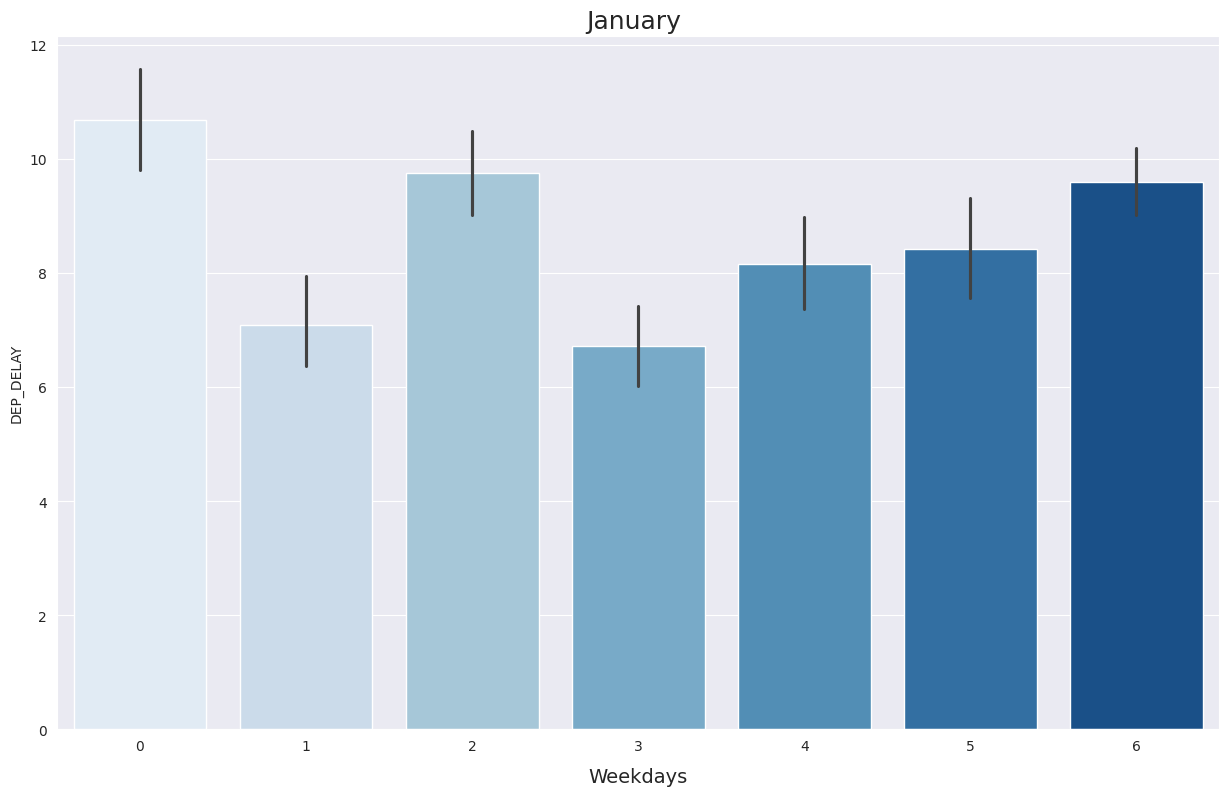

In [67]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="WEEKDAY", y="DEP_DELAY", data=dfm_jan, palette="Blues")
plt.title('January ', fontsize=18)
plt.xlabel('Weekdays', fontsize=14, labelpad=10);
plt.show()

In [69]:
dfm.shape

(1191574, 20)

In [70]:
dfm.isna().sum()

AIRLINE             0
ORIGIN_CITY         0
DEST_CITY           0
CRS_DEP_TIME        0
DEP_DELAY           0
TAXI_OUT            0
WHEELS_OFF          0
WHEELS_ON           0
TAXI_IN             0
CRS_ARR_TIME        0
ARR_DELAY           0
CRS_ELAPSED_TIME    0
ELAPSED_TIME        0
AIR_TIME            0
DISTANCE            0
DAY                 0
MONTH               0
YEAR                0
FLIGHT_STATUS       0
WEEKDAY             0
dtype: int64

PREDICTING FLIGHT DELAYS

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

from sklearn import metrics, linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from scipy.optimize import curve_fit
from sklearn.svm import SVC
from random import sample

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, LabelBinarizer

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats

In [72]:
dfm = pd.read_csv('dfm.csv', index_col=0)
dfm.head()

,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,YEAR,FLIGHT_STATUS,WEEKDAY
0,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,MSP,"Minneapolis, MN",SEA,"Seattle, WA",4,-6.0,9.0,4,4,38.0,4,-5.0,235.0,236.0,189.0,1399.0,19,11,2022,0,5
1,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,DEN,"Denver, CO",MSP,"Minneapolis, MN",2,6.0,20.0,2,3,5.0,3,0.0,118.0,112.0,87.0,680.0,22,7,2022,1,4
2,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",3,-1.0,27.0,3,4,9.0,4,24.0,260.0,285.0,249.0,1589.0,6,3,2023,1,0
3,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",4,-2.0,15.0,4,4,14.0,4,-1.0,181.0,182.0,153.0,985.0,23,2,2020,0,6
4,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,DCA,"Washington, DC",BOS,"Boston, MA",2,-9.0,23.0,2,2,8.0,2,-29.0,109.0,89.0,58.0,399.0,11,6,2023,0,6


In [73]:
dfm.CRS_DEP_TIME.value_counts(normalize=True)

CRS_DEP_TIME
2    0.387969
3    0.359192
4    0.189990
1    0.062849
Name: proportion, dtype: float64

In [74]:
dfm.CRS_ARR_TIME.value_counts(normalize=True)

CRS_ARR_TIME
3    0.351256
4    0.315163
2    0.307097
1    0.026484
Name: proportion, dtype: float64

In [75]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1191574 entries, 0 to 1857355
Data columns (total 25 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   AIRLINE           1191574 non-null  object 
 1   AIRLINE_DOT       1191574 non-null  object 
 2   AIRLINE_CODE      1191574 non-null  object 
 3   DOT_CODE          1191574 non-null  int64  
 4   ORIGIN            1191574 non-null  object 
 5   ORIGIN_CITY       1191574 non-null  object 
 6   DEST              1191574 non-null  object 
 7   DEST_CITY         1191574 non-null  object 
 8   CRS_DEP_TIME      1191574 non-null  int64  
 9   DEP_DELAY         1191574 non-null  float64
 10  TAXI_OUT          1191574 non-null  float64
 11  WHEELS_OFF        1191574 non-null  int64  
 12  WHEELS_ON         1191574 non-null  int64  
 13  TAXI_IN           1191574 non-null  float64
 14  CRS_ARR_TIME      1191574 non-null  int64  
 15  ARR_DELAY         1191574 non-null  float64
 16  CRS_E

In [76]:
dfm = dfm.drop(columns=['AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'ORIGIN', 'DEST'])

In [77]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1191574 entries, 0 to 1857355
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   AIRLINE           1191574 non-null  object 
 1   ORIGIN_CITY       1191574 non-null  object 
 2   DEST_CITY         1191574 non-null  object 
 3   CRS_DEP_TIME      1191574 non-null  int64  
 4   DEP_DELAY         1191574 non-null  float64
 5   TAXI_OUT          1191574 non-null  float64
 6   WHEELS_OFF        1191574 non-null  int64  
 7   WHEELS_ON         1191574 non-null  int64  
 8   TAXI_IN           1191574 non-null  float64
 9   CRS_ARR_TIME      1191574 non-null  int64  
 10  ARR_DELAY         1191574 non-null  float64
 11  CRS_ELAPSED_TIME  1191574 non-null  float64
 12  ELAPSED_TIME      1191574 non-null  float64
 13  AIR_TIME          1191574 non-null  float64
 14  DISTANCE          1191574 non-null  float64
 15  DAY               1191574 non-null  int64  
 16  MONTH

In [78]:
dfm = dfm.drop(columns=['TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN'])
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1191574 entries, 0 to 1857355
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   AIRLINE           1191574 non-null  object 
 1   ORIGIN_CITY       1191574 non-null  object 
 2   DEST_CITY         1191574 non-null  object 
 3   CRS_DEP_TIME      1191574 non-null  int64  
 4   DEP_DELAY         1191574 non-null  float64
 5   CRS_ARR_TIME      1191574 non-null  int64  
 6   ARR_DELAY         1191574 non-null  float64
 7   CRS_ELAPSED_TIME  1191574 non-null  float64
 8   ELAPSED_TIME      1191574 non-null  float64
 9   AIR_TIME          1191574 non-null  float64
 10  DISTANCE          1191574 non-null  float64
 11  DAY               1191574 non-null  int64  
 12  MONTH             1191574 non-null  int64  
 13  YEAR              1191574 non-null  int64  
 14  FLIGHT_STATUS     1191574 non-null  int64  
 15  WEEKDAY           1191574 non-null  int64  
dtypes: fl

In [79]:
dfm = dfm.drop(columns=['ARR_DELAY', 'DAY'])
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1191574 entries, 0 to 1857355
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   AIRLINE           1191574 non-null  object 
 1   ORIGIN_CITY       1191574 non-null  object 
 2   DEST_CITY         1191574 non-null  object 
 3   CRS_DEP_TIME      1191574 non-null  int64  
 4   DEP_DELAY         1191574 non-null  float64
 5   CRS_ARR_TIME      1191574 non-null  int64  
 6   CRS_ELAPSED_TIME  1191574 non-null  float64
 7   ELAPSED_TIME      1191574 non-null  float64
 8   AIR_TIME          1191574 non-null  float64
 9   DISTANCE          1191574 non-null  float64
 10  MONTH             1191574 non-null  int64  
 11  YEAR              1191574 non-null  int64  
 12  FLIGHT_STATUS     1191574 non-null  int64  
 13  WEEKDAY           1191574 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 136.4+ MB


In [80]:
dfm.shape

(1191574, 14)

In [81]:
dfm.isna().sum()

AIRLINE             0
ORIGIN_CITY         0
DEST_CITY           0
CRS_DEP_TIME        0
DEP_DELAY           0
CRS_ARR_TIME        0
CRS_ELAPSED_TIME    0
ELAPSED_TIME        0
AIR_TIME            0
DISTANCE            0
MONTH               0
YEAR                0
FLIGHT_STATUS       0
WEEKDAY             0
dtype: int64

Data Distribution

In [82]:
def scaling_check(data):

    case_count = dfm['FLIGHT_STATUS'].value_counts() # 'data' is our input which will be any of the 3 dataframes created
    print('Legend:')
    print(case_count)

    plt.figure(figsize=(10,6))
    sns.barplot(x=case_count.index, y=case_count.values)
    plt.rcParams["figure.facecolor"] = "lightblue"
    plt.title('Data Distribution', fontsize=16)
    plt.xlabel('Flight Status', fontsize=12)
    plt.ylabel('Number of Flights', fontsize=12)
    plt.xticks(range(len(case_count.index)), ['ON TIME(0)', 'DELAYED(1)'])
    plt.show()

Legend:
FLIGHT_STATUS
0    779519
1    412055
Name: count, dtype: int64


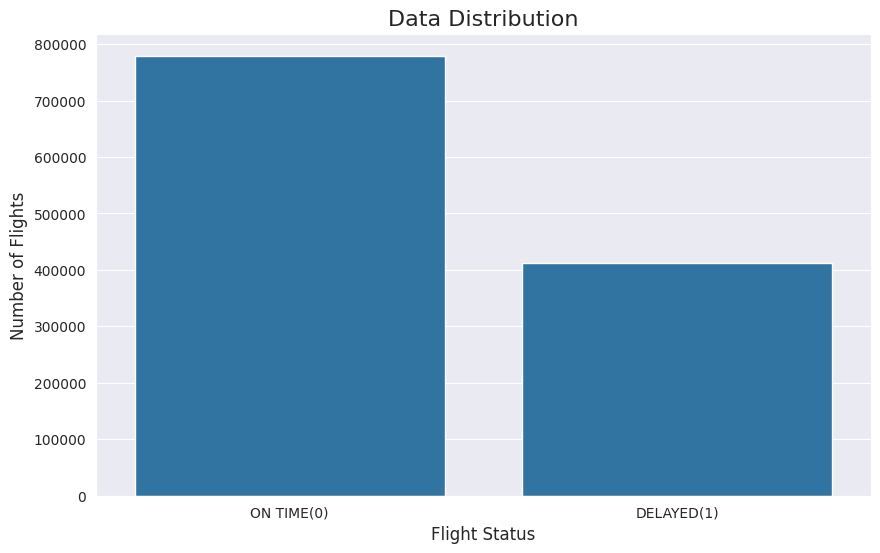

In [83]:
scaling_check(dfm)

In [84]:
dfm.FLIGHT_STATUS.value_counts(normalize=True)

FLIGHT_STATUS
0    0.654193
1    0.345807
Name: proportion, dtype: float64

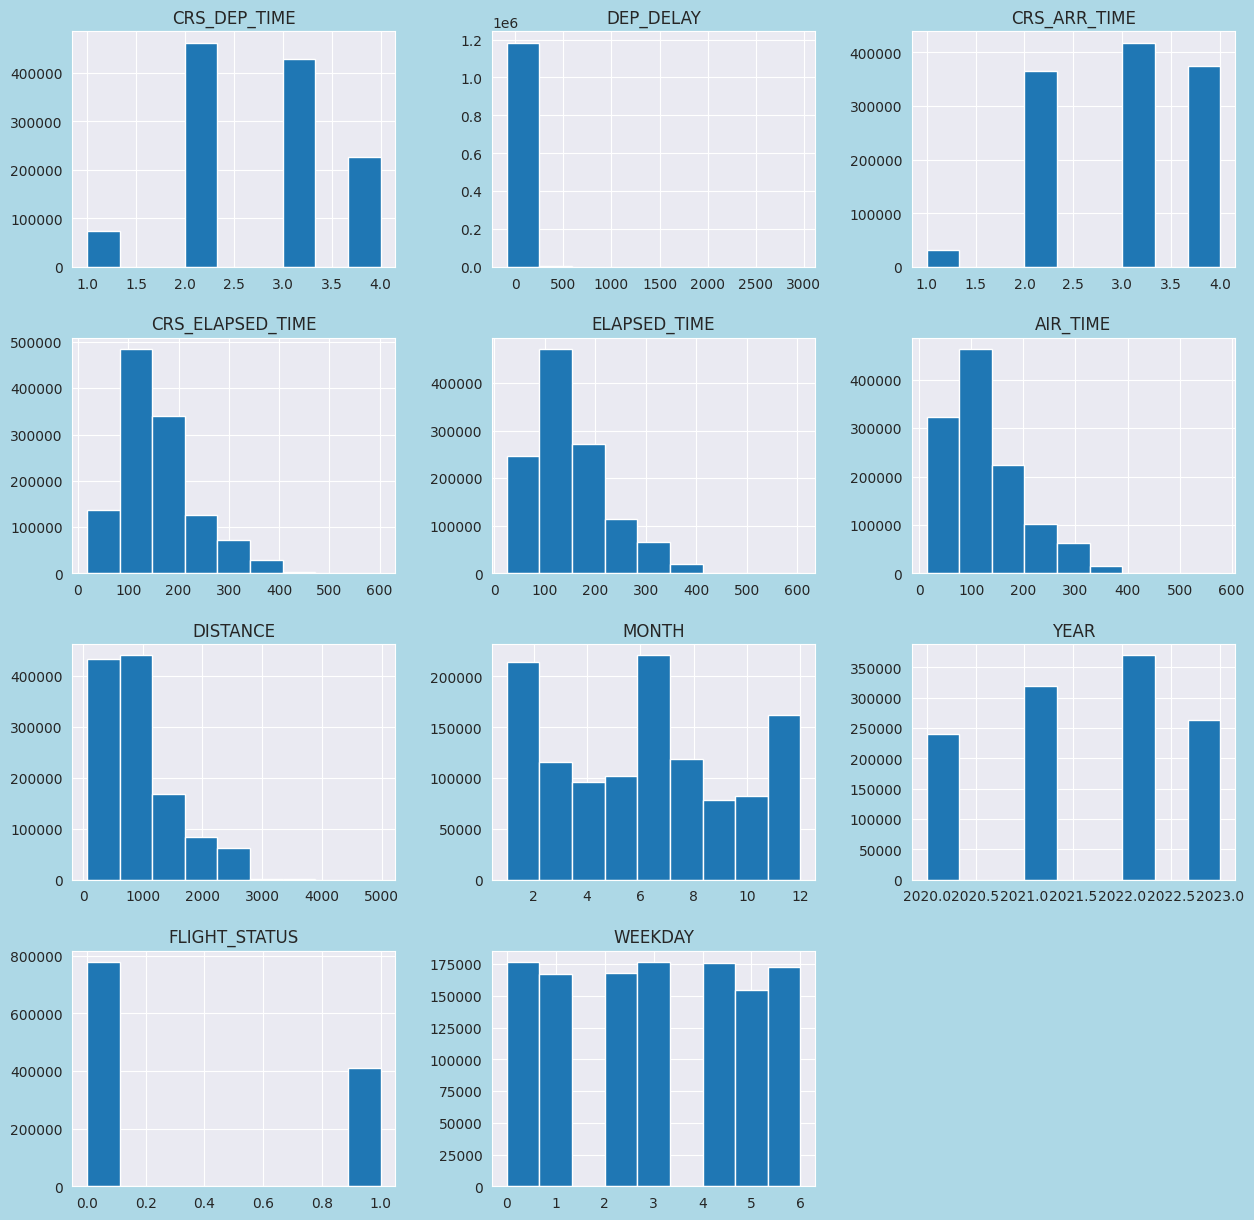

In [85]:
dfm.hist(figsize  = [15, 15],bins=9)
plt.show()

In [86]:
dfm.DEP_DELAY.value_counts(normalize=True)

DEP_DELAY
-5.0       7.628649e-02
-4.0       7.334752e-02
-3.0       7.104720e-02
-6.0       6.514241e-02
-2.0       6.511639e-02
               ...     
 1632.0    8.392261e-07
 1662.0    8.392261e-07
 1247.0    8.392261e-07
 1088.0    8.392261e-07
 1872.0    8.392261e-07
Name: proportion, Length: 1359, dtype: float64

In [87]:
dfm_test=dfm[(dfm['DEP_DELAY'] > 1000)]
dfm_test

,AIRLINE,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,MONTH,YEAR,FLIGHT_STATUS,WEEKDAY
18,Republic Airline,"Minneapolis, MN","Newark, NJ",3,1069.0,3,178.0,233.0,145.0,1008.0,4,2023,1,5
2323,Delta Air Lines Inc.,"Salt Lake City, UT","Los Angeles, CA",4,1022.0,4,120.0,125.0,90.0,590.0,12,2021,1,3
3246,American Airlines Inc.,"Charlotte, NC","Newark, NJ",4,1180.0,4,117.0,122.0,76.0,529.0,2,2021,1,0
8541,SkyWest Airlines Inc.,"Seattle, WA","Los Angeles, CA",3,1056.0,3,169.0,162.0,136.0,954.0,10,2021,1,0
10250,American Airlines Inc.,"Chicago, IL","Charlotte, NC",2,1560.0,2,120.0,101.0,76.0,599.0,6,2023,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838862,SkyWest Airlines Inc.,"St. Louis, MO","Denver, CO",3,1091.0,4,158.0,139.0,113.0,770.0,1,2020,1,5
1841247,SkyWest Airlines Inc.,"South Bend, IN","Atlanta, GA",1,1142.0,2,127.0,97.0,74.0,566.0,11,2022,1,6
1841790,SkyWest Airlines Inc.,"Eau Claire, WI","Chicago, IL",3,1080.0,3,74.0,80.0,53.0,269.0,2,2021,1,0
1847209,SkyWest Airlines Inc.,"Grand Junction, CO","Denver, CO",3,1456.0,3,70.0,84.0,39.0,212.0,7,2020,1,1


Categoricals

In [88]:
AIRLINE_dummies = pd.get_dummies(dfm['AIRLINE'], prefix='AIRLINE', drop_first=True)
DEST_CITY_dummies = pd.get_dummies(dfm['DEST_CITY'], prefix='DEST_CITY', drop_first=True)
CRS_DEP_TIME_dummies = pd.get_dummies(dfm['CRS_DEP_TIME'], prefix='CRS_DEP_TIME', drop_first=True)
CRS_ARR_TIME_dummines = pd.get_dummies(dfm['CRS_ARR_TIME'], prefix='CRS_ARR_TIME', drop_first=True)
MONTH_dummies = pd.get_dummies(dfm['MONTH'], prefix='MONTH', drop_first=True)
WEEKDAY_dummies = pd.get_dummies(dfm['WEEKDAY'], prefix='WEEKDAY', drop_first=True)
YEAR_dummies = pd.get_dummies(dfm['YEAR'], prefix='YEAR', drop_first=True)

In [89]:
dfm = dfm.drop(['AIRLINE', 'ORIGIN_CITY', 'DEST_CITY', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'MONTH', 'WEEKDAY', 'YEAR'], axis=1)

In [90]:
dfm = pd.concat([dfm, AIRLINE_dummies, DEST_CITY_dummies, CRS_DEP_TIME_dummies, CRS_ARR_TIME_dummines, MONTH_dummies, WEEKDAY_dummies, YEAR_dummies], axis=1)

In [91]:
dfm.head(2)

,DEP_DELAY,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,AIRLINE_American Airlines Inc.,AIRLINE_Delta Air Lines Inc.,AIRLINE_Frontier Airlines Inc.,AIRLINE_JetBlue Airways,AIRLINE_Republic Airline,AIRLINE_SkyWest Airlines Inc.,AIRLINE_Southwest Airlines Co.,AIRLINE_Spirit Air Lines,AIRLINE_United Air Lines Inc.,"DEST_CITY_Baltimore, MD","DEST_CITY_Boston, MA","DEST_CITY_Charlotte, NC","DEST_CITY_Chicago, IL","DEST_CITY_Dallas/Fort Worth, TX","DEST_CITY_Denver, CO","DEST_CITY_Detroit, MI","DEST_CITY_Fort Lauderdale, FL","DEST_CITY_Houston, TX","DEST_CITY_Las Vegas, NV","DEST_CITY_Los Angeles, CA","DEST_CITY_Miami, FL","DEST_CITY_Minneapolis, MN","DEST_CITY_Nashville, TN","DEST_CITY_New York, NY","DEST_CITY_Newark, NJ","DEST_CITY_Orlando, FL","DEST_CITY_Philadelphia, PA","DEST_CITY_Phoenix, AZ","DEST_CITY_Salt Lake City, UT","DEST_CITY_San Diego, CA","DEST_CITY_San Francisco, CA","DEST_CITY_Seattle, WA","DEST_CITY_Washington, DC",CRS_DEP_TIME_2,CRS_DEP_TIME_3,CRS_DEP_TIME_4,CRS_ARR_TIME_2,CRS_ARR_TIME_3,CRS_ARR_TIME_4,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6,YEAR_2021,YEAR_2022,YEAR_2023
0,-6.0,235.0,236.0,189.0,1399.0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False
1,6.0,118.0,112.0,87.0,680.0,1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False


In [92]:
dfm.shape

(1191574, 65)

Random Forest

In [121]:
# Create features (X) and labels (y)
y = dfm['FLIGHT_STATUS']
X = dfm.drop(['FLIGHT_STATUS'], axis=1)

In [122]:
# Perform the split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.20, random_state=42)

In [123]:
# Build a regular tree as baseline
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, class_weight="balanced")
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

Model Performance

In [124]:
# Test set predictions
pred = tree_clf.predict(X_test)

In [125]:
# confusion matrix and classfication report
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,574881,48570,623451
1,103177,226631,329808
All,678058,275201,953259


In [126]:
print('Classificiation Report')
print('---------------------')
print(classification_report(y_test, pred))

Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.85      0.92      0.88    623451
           1       0.82      0.69      0.75    329808

    accuracy                           0.84    953259
   macro avg       0.84      0.80      0.82    953259
weighted avg       0.84      0.84      0.84    953259



In [127]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 84.08%


ROC Curve for Decision Tree

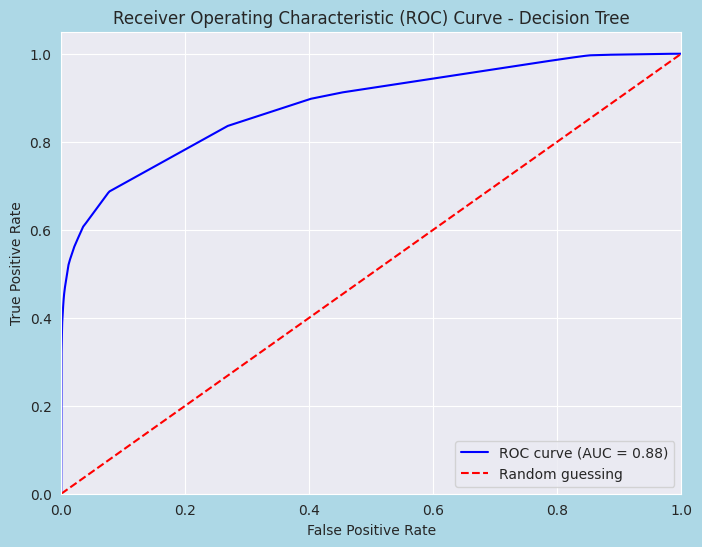

In [128]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have the true labels (y_test) and predicted probabilities (y_prob) for the positive class

# Predict probabilities for the test set
y_prob = tree_clf.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

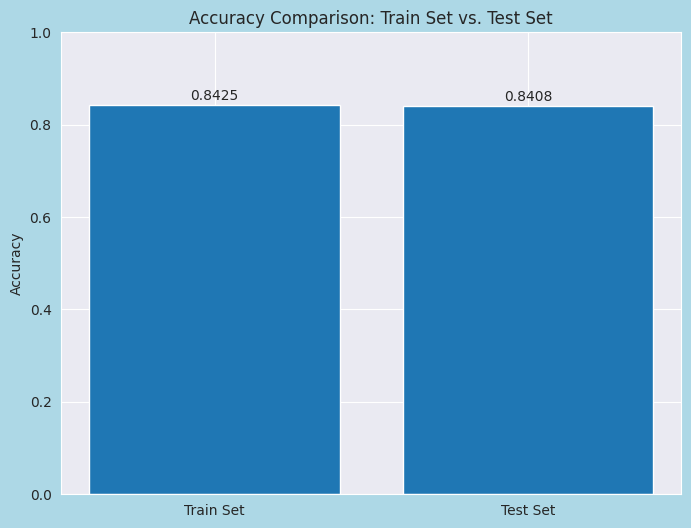

In [129]:
import matplotlib.pyplot as plt

# Predict on the training set
train_pred = tree_clf.predict(X_train)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, pred)

# Create a bar graph
labels = ['Train Set', 'Test Set']
accuracy_scores = [train_accuracy, test_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracy_scores)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Train Set vs. Test Set')
plt.ylim([0, 1])

for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

plt.show()

XGBoost

XGBoost Performance:
Test Set Accuracy Score: 0.988095587772486
Validation Set Accuracy Score: 0.9879151543125695


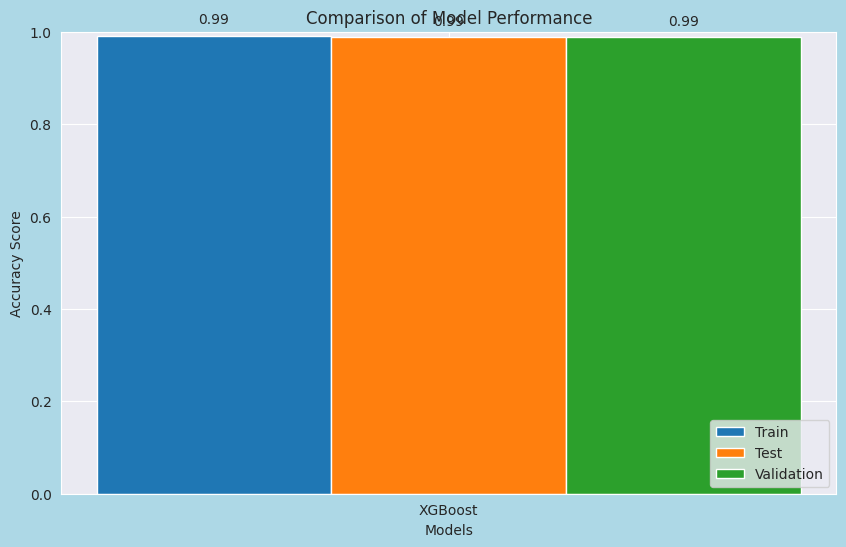

XGBoost Performance:
Test Set Accuracy Score: 0.988095587772486
Validation Set Accuracy Score: 0.9879151543125695
Training Set Accuracy: 0.9905377204368454
XGBoost Performance:
Test Set Accuracy Score: 0.988095587772486
Validation Set Accuracy Score: 0.9879151543125695
Confusion Matrix (Test Set):
 [[154940   1009]
 [  1828  80538]]
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    155949
           1       0.99      0.98      0.98     82366

    accuracy                           0.99    238315
   macro avg       0.99      0.99      0.99    238315
weighted avg       0.99      0.99      0.99    238315



In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Create features (X) and labels (y)
y = dfm['FLIGHT_STATUS']
X = dfm.drop(['FLIGHT_STATUS'], axis=1)

# Split the data into training, testing, and validation sets (60/20/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Create and train the models
xgb_clf = XGBClassifier(n_estimators=100, random_state=42, enable_categorical = True)

xgb_clf.fit(X_train, y_train)

# Make predictions on the test and validation sets
xgb_pred_test = xgb_clf.predict(X_test)
xgb_pred_val = xgb_clf.predict(X_val)

# Evaluate the models
print("XGBoost Performance:")
print("Test Set Accuracy Score:", accuracy_score(y_test, xgb_pred_test))
print("Validation Set Accuracy Score:", accuracy_score(y_val, xgb_pred_val))

# Plot the comparison graph
plt.figure(figsize=(10, 6))
models = ['XGBoost']
train_scores = [accuracy_score(y_train, xgb_clf.predict(X_train))]
test_scores = [accuracy_score(y_test, xgb_pred_test)]
val_scores = [accuracy_score(y_val, xgb_pred_val)]

x = range(len(models))
width = 0.25

plt.bar([i - width for i in x], train_scores, width, label='Train')
plt.bar(x, test_scores, width, label='Test')
plt.bar([i + width for i in x], val_scores, width, label='Validation')

plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Performance')
plt.xticks(x, models)
plt.legend(loc='lower right')

# Adding text labels for accuracy scores
for i in range(len(models)):
    plt.text(i - width, train_scores[i] + 0.02, f'{train_scores[i]:.2f}', ha='center', va='bottom')
    plt.text(i, test_scores[i] + 0.02, f'{test_scores[i]:.2f}', ha='center', va='bottom')
    plt.text(i + width, val_scores[i] + 0.02, f'{val_scores[i]:.2f}', ha='center', va='bottom')

plt.ylim([0, 1])
plt.show()

print("XGBoost Performance:")
print("Test Set Accuracy Score:", accuracy_score(y_test, xgb_pred_test))
print("Validation Set Accuracy Score:", accuracy_score(y_val, xgb_pred_val))
train_pred = xgb_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print("Training Set Accuracy:", train_accuracy)

print("XGBoost Performance:")
print("Test Set Accuracy Score:", accuracy_score(y_test, xgb_pred_test))
print("Validation Set Accuracy Score:", accuracy_score(y_val, xgb_pred_val))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, xgb_pred_test))
print("Classification Report (Test Set):\n", classification_report(y_test, xgb_pred_test))

ROC Curve for XGBoost

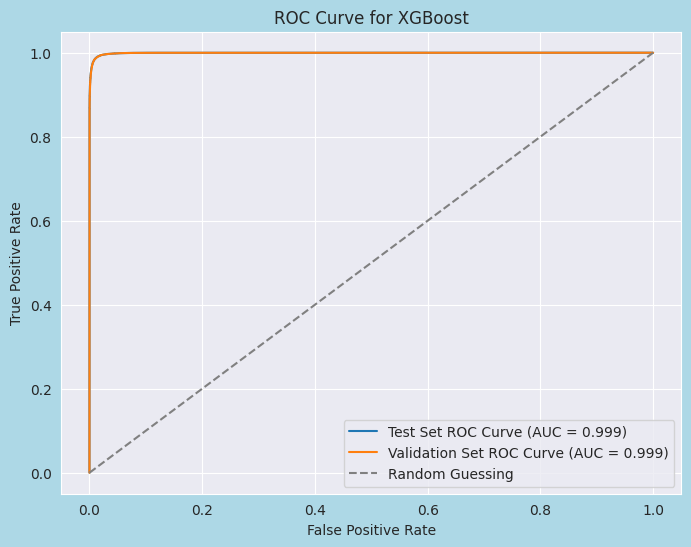

XGBoost Performance:
Test Set Accuracy Score: 0.988095587772486
Test Set ROC AUC Score: 0.9993836127275367
Validation Set Accuracy Score: 0.9879151543125695
Validation Set ROC AUC Score: 0.9993548754704364


In [103]:
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# Compute the ROC curve and AUC for the test set
xgb_prob_test = xgb_clf.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, xgb_prob_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Compute the ROC curve and AUC for the validation set
xgb_prob_val = xgb_clf.predict_proba(X_val)[:, 1]
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, xgb_prob_val)
roc_auc_val = auc(fpr_val, tpr_val)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Test Set ROC Curve (AUC = {roc_auc_test:.3f})')
plt.plot(fpr_val, tpr_val, label=f'Validation Set ROC Curve (AUC = {roc_auc_val:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend()
plt.grid(True)
plt.show()

# Print the accuracy scores and ROC AUC scores
print("XGBoost Performance:")
print("Test Set Accuracy Score:", accuracy_score(y_test, xgb_pred_test))
print("Test Set ROC AUC Score:", roc_auc_test)
print("Validation Set Accuracy Score:", accuracy_score(y_val, xgb_pred_val))
print("Validation Set ROC AUC Score:", roc_auc_val)